# Dataset Information

A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

# Data

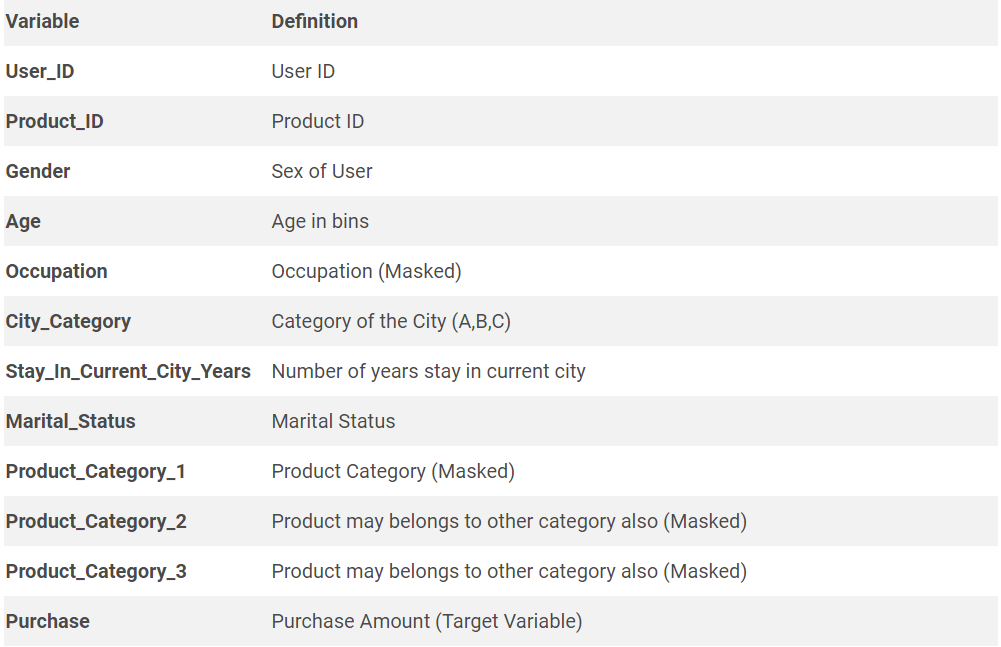

# Import modules

In [132]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Loading the dataset

In [133]:
df1 = pd.read_csv("D:/New folder (2)/train.csv")
test = pd.read_csv("D:/New folder (2)/test.csv")

In [134]:
df1

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [135]:
df1.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [136]:
df1.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [137]:
df1['Product_Category_2'].fillna(df1['Product_Category_2'].mean(),inplace=True)

In [138]:
df1['Product_Category_3'].fillna(df1['Product_Category_3'].mean(),inplace=True)

In [139]:
a = round(df1['Product_Category_2'],1)

In [140]:
b = round(df1['Product_Category_3'],1)

In [141]:
df1['Product_Category_3'] = (b)

In [142]:
df1['Product_Category_2'] = (a)

In [143]:
df1

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,9.8,12.7,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,9.8,12.7,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,12.7,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,9.8,12.7,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,9.8,12.7,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,9.8,12.7,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,9.8,12.7,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,9.8,12.7,365


In [145]:
df1.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

# EDA

<AxesSubplot:xlabel='Occupation', ylabel='Density'>

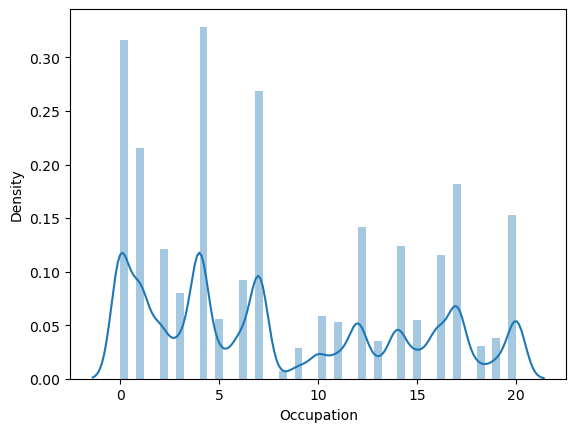

In [147]:
sns.distplot(df1['Occupation'])

<AxesSubplot:xlabel='Product_Category_1', ylabel='Density'>

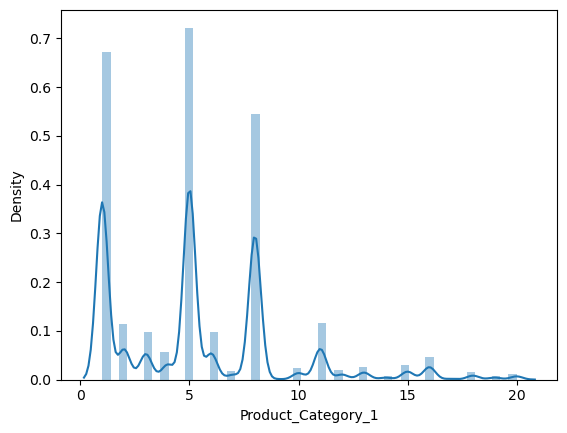

In [148]:
sns.distplot(df1['Product_Category_1'])

<AxesSubplot:xlabel='Product_Category_2', ylabel='Density'>

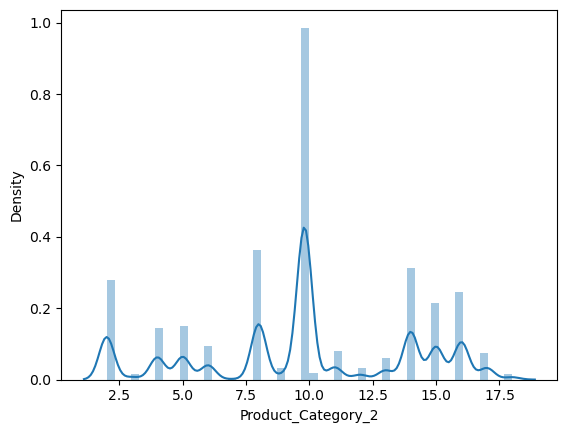

In [149]:
sns.distplot(df1['Product_Category_2'])

<AxesSubplot:xlabel='Product_Category_3', ylabel='Density'>

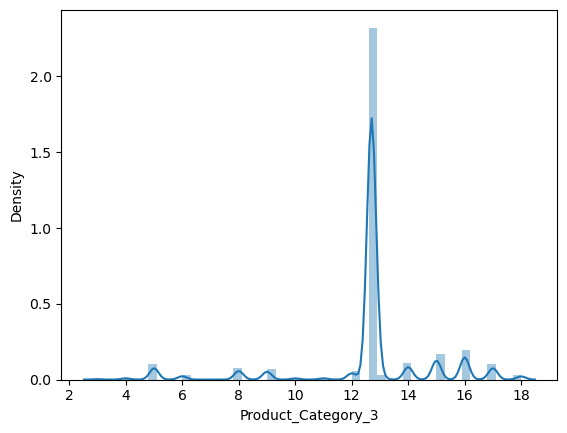

In [150]:
sns.distplot(df1['Product_Category_3'])

<AxesSubplot:xlabel='Gender', ylabel='count'>

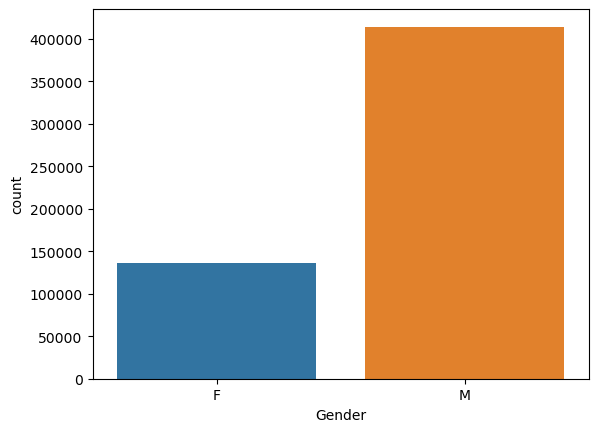

In [151]:
sns.countplot(df1['Gender'])

<AxesSubplot:xlabel='Age', ylabel='count'>

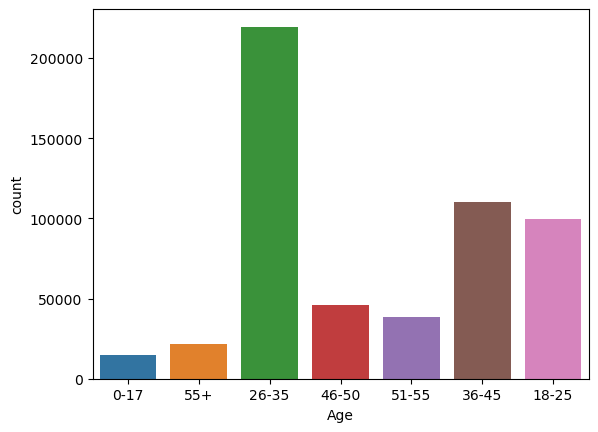

In [152]:
sns.countplot(df1['Age'])

<AxesSubplot:xlabel='City_Category', ylabel='count'>

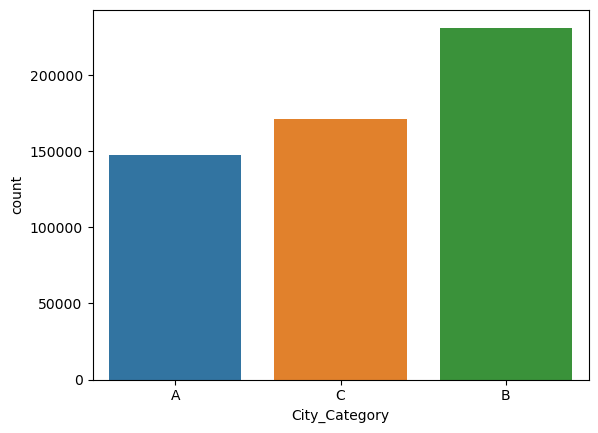

In [153]:
sns.countplot(df1['City_Category'])

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

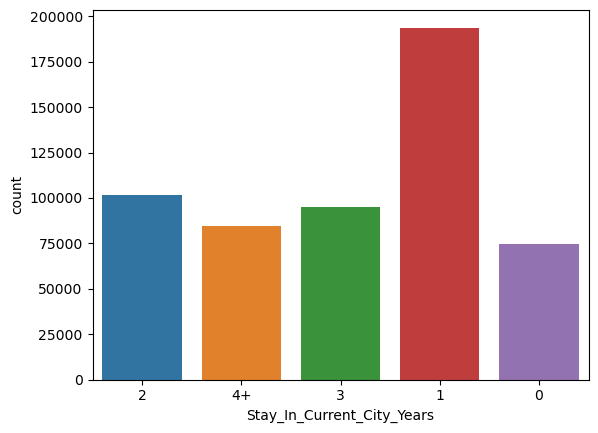

In [154]:
sns.countplot(df1['Stay_In_Current_City_Years'])

In [155]:
test['Product_Category_2'].fillna(test['Product_Category_2'].mean(),inplace=True)
test['Product_Category_3'].fillna(test['Product_Category_3'].mean(),inplace=True)

In [156]:
a1 = round(df1['Product_Category_2'],1)
b1 = round(df1['Product_Category_3'],1)

In [157]:
test['Product_Category_2'] = (a1) 

In [158]:
test['Product_Category_3'] = (b1)

In [159]:
test

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,9.8,12.7
1,1000009,P00113442,M,26-35,17,C,0,0,3,6.0,14.0
2,1000010,P00288442,F,36-45,1,B,4+,1,5,9.8,12.7
3,1000010,P00145342,F,36-45,1,B,4+,1,4,14.0,12.7
4,1000011,P00053842,F,26-35,1,C,1,0,4,9.8,12.7
...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,15.0,12.7
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,2.0,12.7
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,15.0,16.0
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,8.0,12.7


In [160]:
test.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
dtype: object

# Coorelation Matrix

<AxesSubplot:>

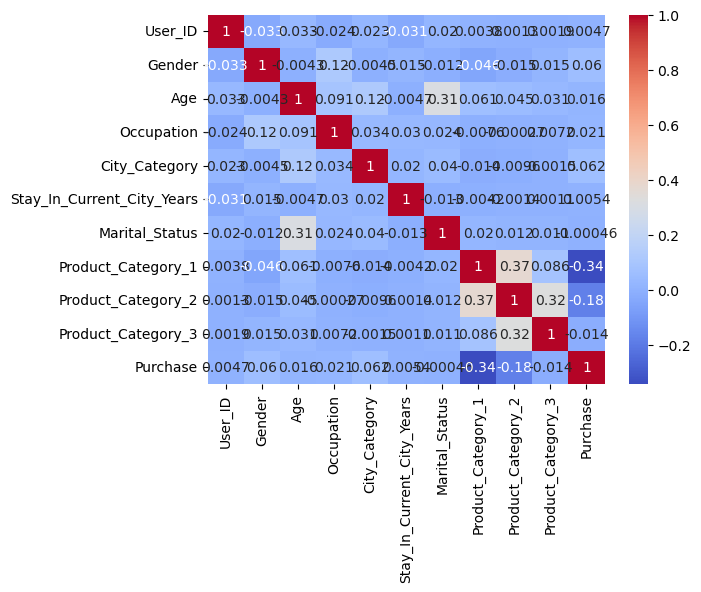

In [182]:
corr = df1.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')

# Label Encoding

In [162]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_col = ['Gender','Age','City_Category','Stay_In_Current_City_Years']
for col in cat_col:
    df1[col] = le.fit_transform(df1[col])

In [164]:
df1

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,9.8,12.7,8370
1,1000001,P00248942,0,0,10,0,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0,10,0,2,0,12,9.8,12.7,1422
3,1000001,P00085442,0,0,10,0,2,0,12,14.0,12.7,1057
4,1000002,P00285442,1,6,16,2,4,0,8,9.8,12.7,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,1,5,13,1,1,1,20,9.8,12.7,368
550064,1006035,P00375436,0,2,1,2,3,0,20,9.8,12.7,371
550065,1006036,P00375436,0,2,15,1,4,1,20,9.8,12.7,137
550066,1006038,P00375436,0,6,1,2,2,0,20,9.8,12.7,365


# Input Split

In [167]:
y = df1['Purchase']

In [168]:
X = df1.drop(columns = ['Purchase','User_ID','Product_ID'])

# Model Training

In [170]:
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import mean_squared_error
def train(model,X,y):
    model.fit(X,y)
    x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    cv_score = cross_val_score(model,X,y,scoring='neg_mean_squared_error')
    cv_score = np.abs(np.mean(cv_score))
    print('Results')
    print('MSE:',np.sqrt(mean_squared_error(y_test, pred)))
    print('CV Score:', np.sqrt(cv_score))

Results
MSE: 4684.897957159216
CV Score: 4692.236591565275


<AxesSubplot:title={'center':'Model Coefficients'}>

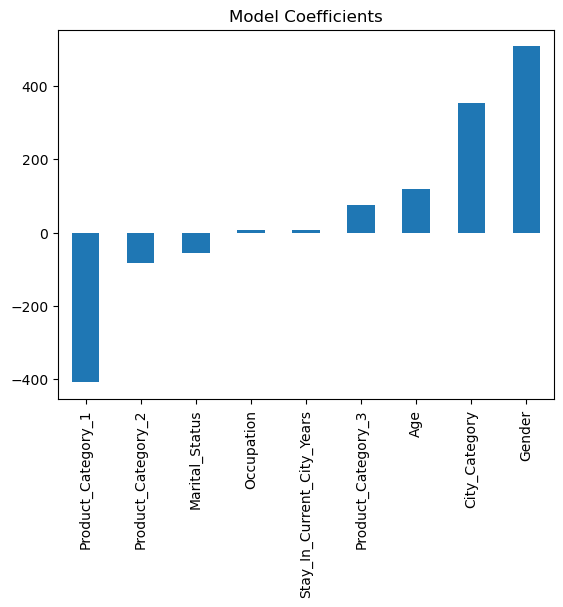

In [171]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(normalize=True)
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title='Model Coefficients')

Results
MSE: 3361.0217880748846
CV Score: 3338.320895491372


<AxesSubplot:title={'center':'Feature Importance'}>

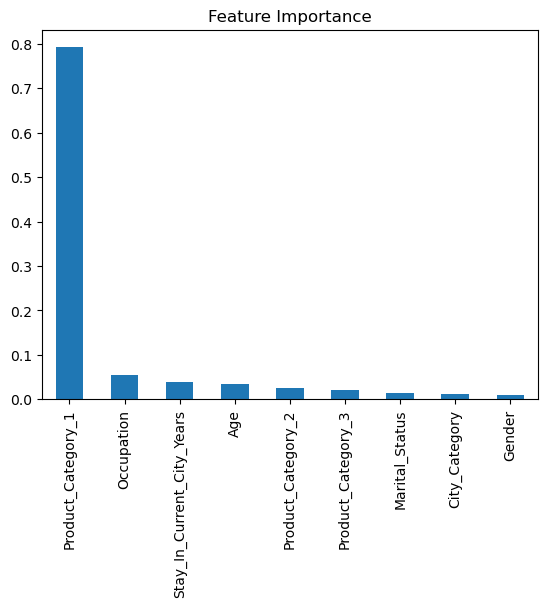

In [172]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model, X, y)
features = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
features.plot(kind='bar', title='Feature Importance')

Results
MSE: 3061.621467245892
CV Score: 3051.9317082964394


<AxesSubplot:title={'center':'Feature Importance'}>

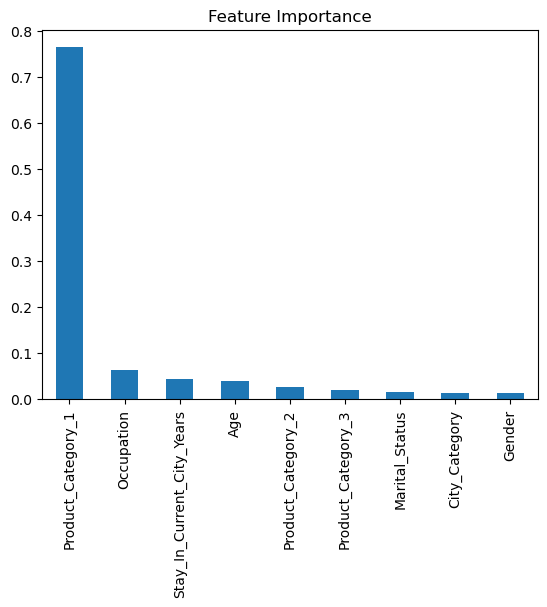

In [173]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs=-1)
train(model, X, y)
features = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
features.plot(kind='bar', title='Feature Importance')

In [174]:
x_test

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1,4,7,1,2,1,1,9.8,12.7
1,1,2,17,2,0,0,3,6.0,14.0
2,0,3,1,1,4,1,5,9.8,12.7
3,0,3,1,1,4,1,4,14.0,12.7
4,0,2,1,2,1,0,4,9.8,12.7
...,...,...,...,...,...,...,...,...,...
233594,0,2,15,1,4,1,8,15.0,12.7
233595,0,2,15,1,4,1,5,2.0,12.7
233596,0,2,15,1,4,1,1,15.0,16.0
233597,0,4,1,2,4,0,10,8.0,12.7


In [175]:
x_test = test.drop(columns=['User_ID','Product_ID'])

In [176]:
pred = model.predict(X)

In [177]:
pred

array([ 9627.49      , 14550.01866667,  1594.40955952, ...,
         205.945     ,   320.96      ,   479.70083333])

In [178]:
submission = pd.DataFrame()
submission['User_ID'] = df1['User_ID']
submission['Product_ID'] = df1['Product_ID']
submission['Purchase'] = pred

In [179]:
submission

,User_ID,Product_ID,Purchase
0,1000001,P00069042,9627.490000
1,1000001,P00248942,14550.018667
2,1000001,P00087842,1594.409560
3,1000001,P00085442,1174.440417
4,1000002,P00285442,8528.915698
...,...,...,...
550063,1006033,P00372445,476.912667
550064,1006035,P00375436,403.053357
550065,1006036,P00375436,205.945000
550066,1006038,P00375436,320.960000


In [181]:
submission.to_csv("SampleSubmission.csv",index=False)